In [1]:
import random as pyrandom
figsize(8,8)
matplotlib.rc("image",cmap="gray")
matplotlib.rc("image",interpolation="nearest")

In [2]:
ccolors = ['c+','g+','b+','y+','r+','m+','b+']
def plotclusters(data,centers=None):
    xlim([0,100]); ylim([0,100])
    if centers is None:
        plot(data[:,0],data[:,1],'b+')
    else:
        for i in range(amax(centers)+1):
            plot(data[centers==i,0],data[centers==i,1],ccolors[i%len(ccolors)])

# K-Means Clustering

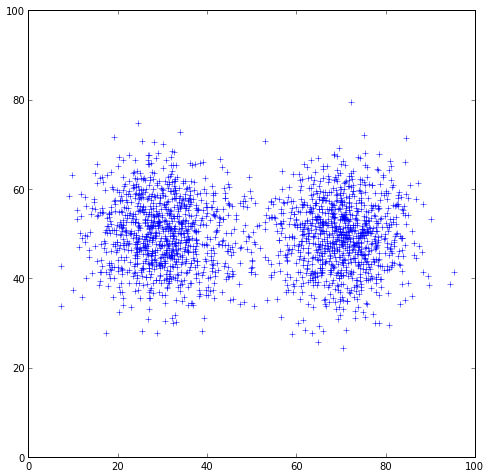

In [11]:
data = r_[8*randn(1000,2)+array([70,50]),
          8*randn(1000,2)+array([30,50])]
shuffle(data)
plotclusters(data)

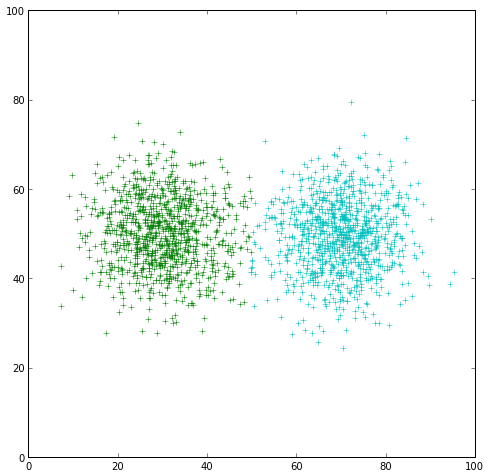

In [12]:
from sklearn.cluster import KMeans
km = KMeans(2)
centers = km.fit_predict(data)
plotclusters(data,centers)

# Number of Clusters

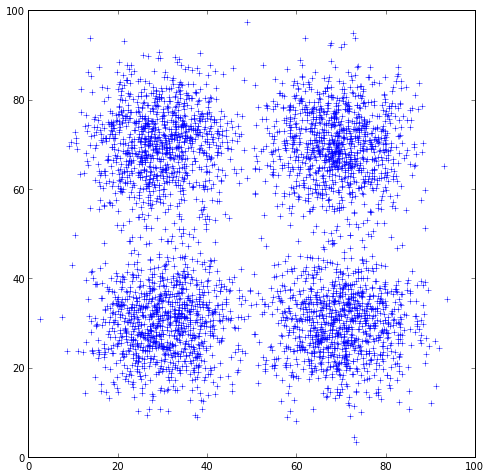

In [13]:
data = r_[8*randn(1000,2)+array([70,70]),
          8*randn(1000,2)+array([30,30]),
          8*randn(1000,2)+array([30,70]),
          8*randn(1000,2)+array([70,30]),
]
shuffle(data)
plotclusters(data)

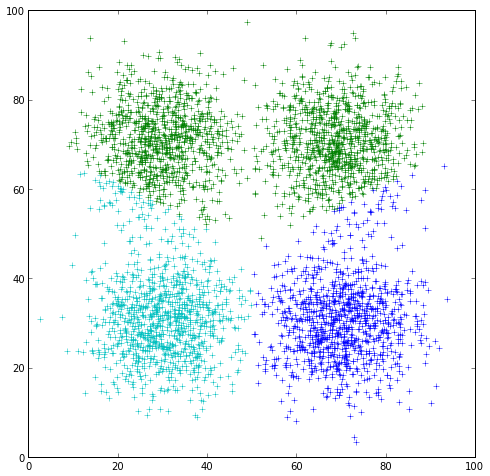

In [14]:
km = KMeans(3)
centers = km.fit_predict(data)
plotclusters(data,centers)

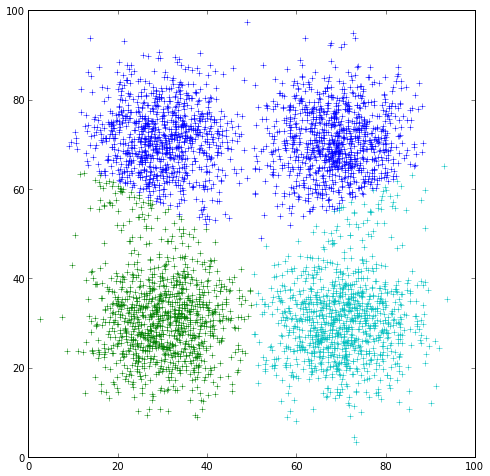

In [15]:
km = KMeans(3)
centers = km.fit_predict(data)
plotclusters(data,centers)

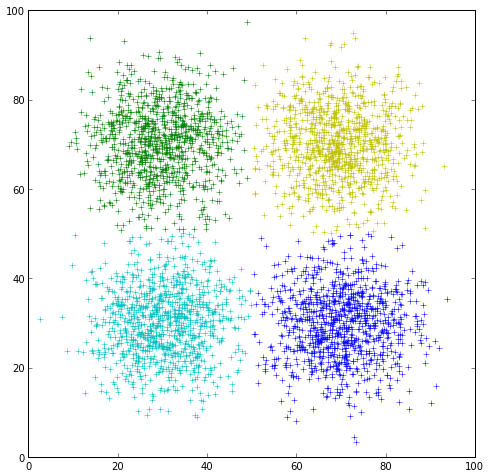

In [16]:
km = KMeans(4)
centers = km.fit_predict(data)
plotclusters(data,centers)

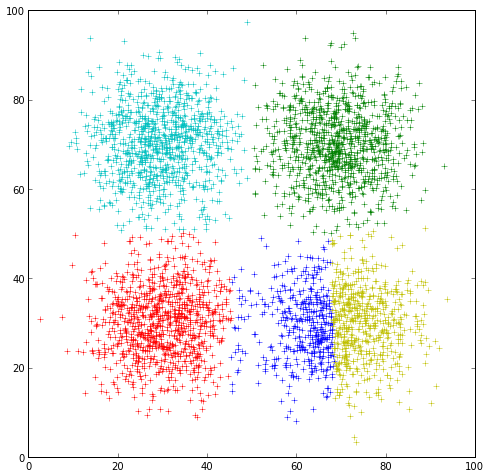

In [17]:
km = KMeans(5)
centers = km.fit_predict(data)
plotclusters(data,centers)

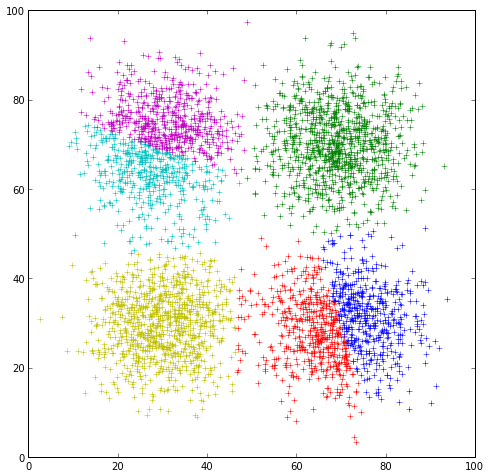

In [18]:
km = KMeans(6)
centers = km.fit_predict(data)
plotclusters(data,centers)

# Anisotropic Clusters and Mixture Models

In [19]:
data = r_[dot(randn(1000,2),diag([5,12]))+array([60,60]),
           dot(randn(1000,2),diag([5,12]))+array([40,40])]
shuffle(data)

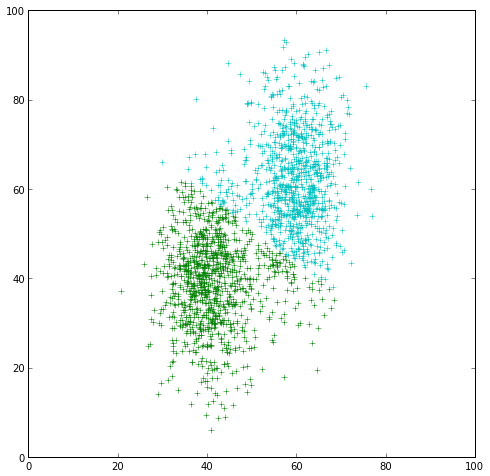

In [20]:
from sklearn.cluster import KMeans
km = KMeans(2)
centers = km.fit_predict(data)
plotclusters(data,centers)

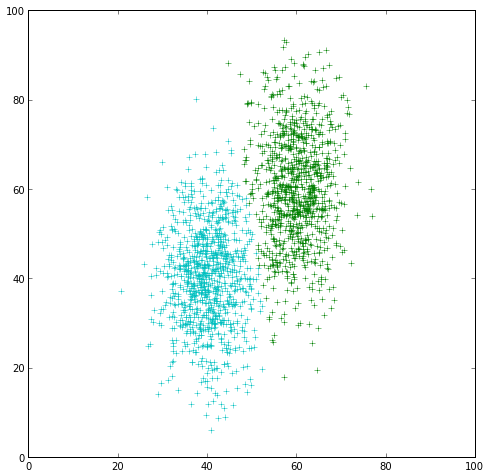

In [21]:
from sklearn.mixture import GMM
gmm = GMM(n_components=2,covariance_type='diag')
gmm.fit(data)
lcenters = gmm.predict(data)
plotclusters(data,lcenters)

# scipy.cluster.vq

In [22]:
data = r_[8*randn(1000,2)+array([70,50]),
          8*randn(1000,2)+array([30,50])]
shuffle(data)

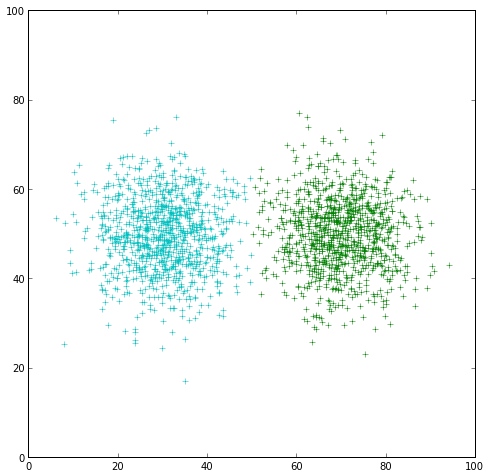

In [23]:
from scipy.cluster import vq
vectors,_ = vq.kmeans(data,2)
centers,_ = vq.vq(data,vectors)
plotclusters(data,centers)

# Cluster Validity

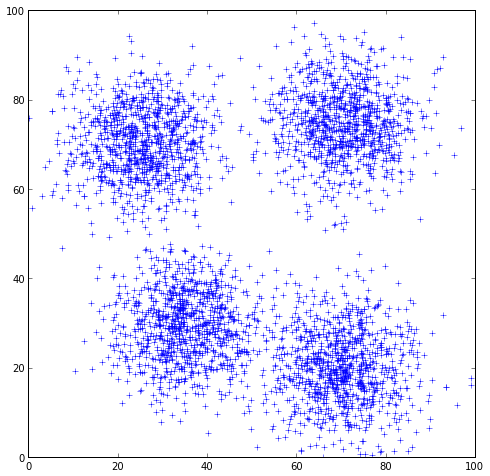

In [24]:
data = r_[8*randn(1000,2)+array([70,75]),
          8*randn(1000,2)+array([35,30]),
          8*randn(1000,2)+array([25,70]),
          8*randn(1000,2)+array([70,20]),
]
shuffle(data)
plotclusters(data)

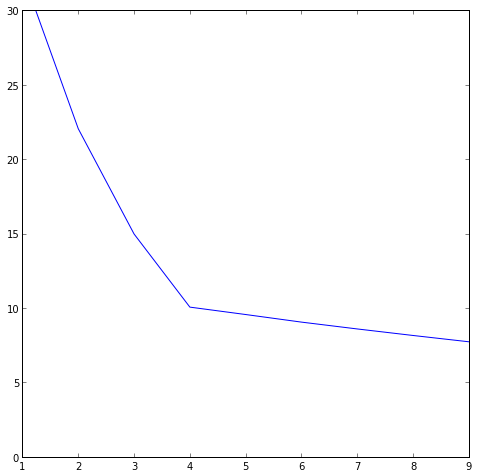

In [25]:
from scipy.cluster import vq
nclusters = range(1,10)
errors = []
for i in nclusters:
    vectors,error = vq.kmeans(data,i)
    errors.append(error)
ylim((0,30))
plot(nclusters,errors)
errors = array(errors)

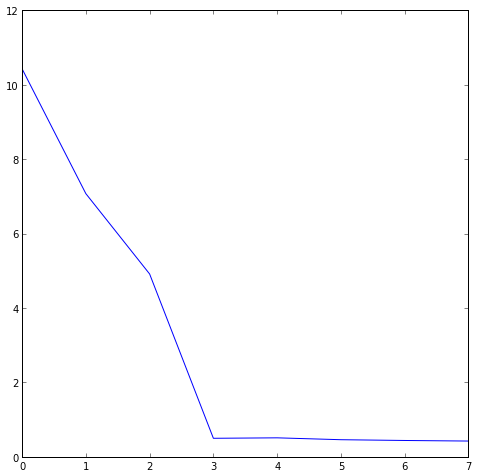

In [26]:
plot(errors[:-1]-errors[1:])

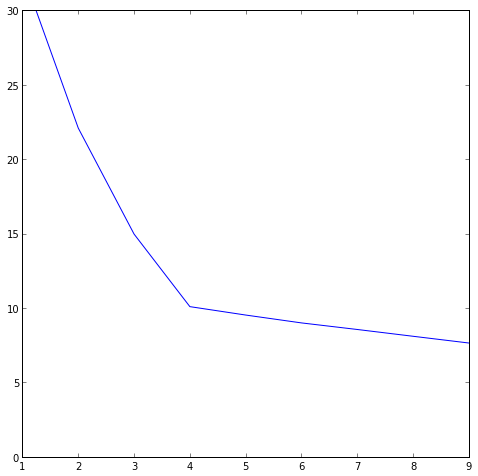

In [27]:
from scipy.cluster import vq
nclusters = range(1,10)
merrors = []
for i in nclusters:
    terrors = []
    for j in range(10):
        sample = array(pyrandom.sample(data,len(data)//2))
        vectors,error = vq.kmeans(sample,i)
        terrors.append(error)
    merrors.append(mean(terrors))
ylim((0,30))
plot(nclusters,merrors)

(0, 100)

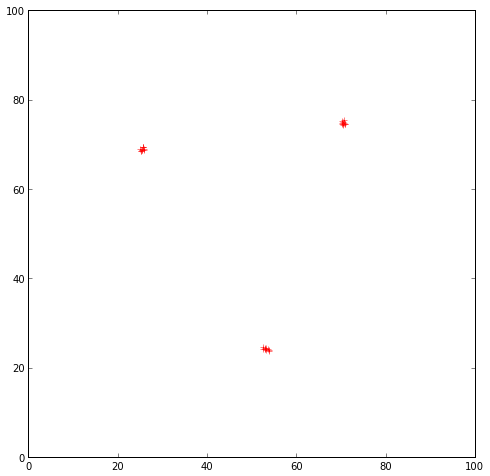

In [28]:
from scipy.cluster import vq
nclusters = range(3,4)
errors = []
for i in nclusters:
    allvs = []
    for j in range(10):
        subset = array(pyrandom.sample(data,len(data)//2))
        vectors,error = vq.kmeans(subset,i)
        allvs += list(vectors)
    allvs = array(allvs)
    plot(allvs[:,0],allvs[:,1],'r+')
xlim((0,100)); ylim((0,100))

(0, 100)

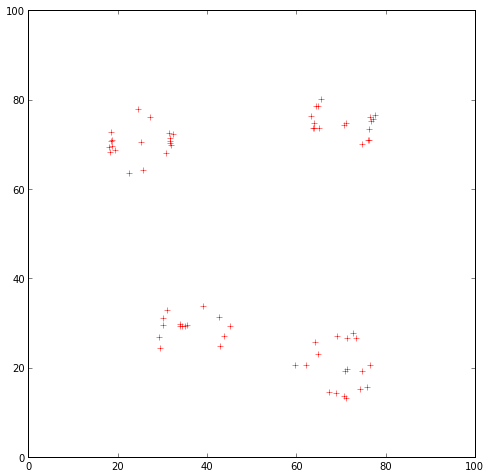

In [29]:
from scipy.cluster import vq
nclusters = range(7,8)
errors = []
for i in nclusters:
    allvs = []
    for j in range(10):
        subset = array(pyrandom.sample(data,len(data)//2))
        vectors,error = vq.kmeans(subset,i)
        allvs += list(vectors)
    allvs = array(allvs)
    plot(allvs[:,0],allvs[:,1],'r+')
xlim((0,100)); ylim((0,100))

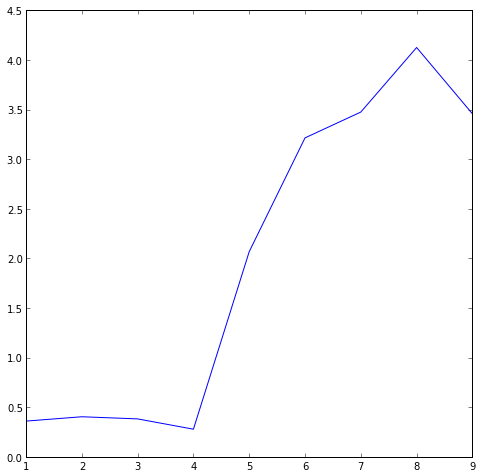

In [30]:
spreads = []
nclusters = range(1,10)
for i in nclusters:
    allvs = []
    for j in range(10):
        subset = array(pyrandom.sample(data,len(data)//2))
        vectors,error = vq.kmeans(subset,i)
        allvs += list(vectors)
    _,spread = vq.kmeans(array(allvs),i)
    spreads.append(spread)
plot(nclusters,spreads)

# Failure of Cluster Validity Tests

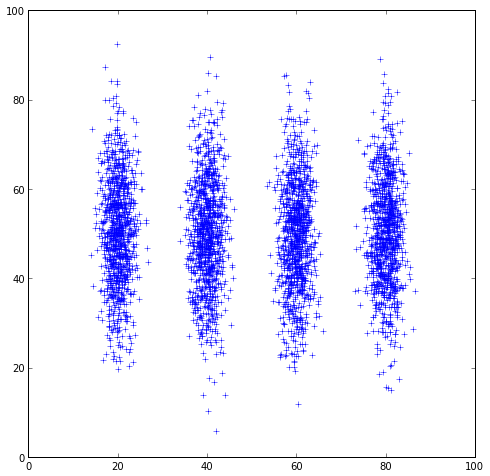

In [41]:
data = r_[dot(randn(1000,2),diag([2,12]))+array([60,50]),
          dot(randn(1000,2),diag([2,12]))+array([40,50]),
          dot(randn(1000,2),diag([2,12]))+array([20,50]),
          dot(randn(1000,2),diag([2,12]))+array([80,50])
]
shuffle(data)
plotclusters(data)

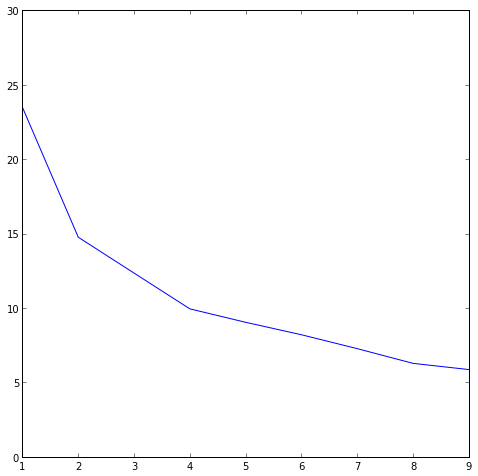

In [42]:
from scipy.cluster import vq
nclusters = range(1,10)
errors = []
for i in nclusters:
    vectors,error = vq.kmeans(data,i)
    errors.append(error)
ylim((0,30))
plot(nclusters,errors)
errors = array(errors)

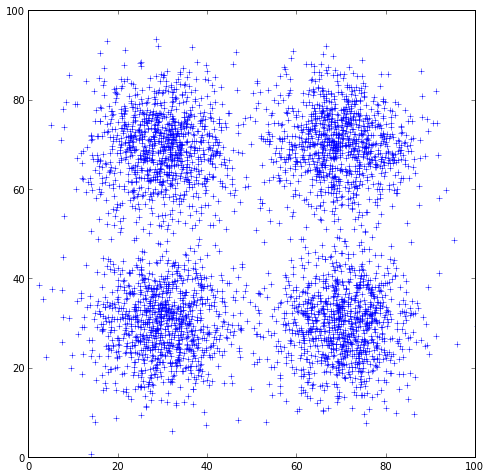

In [31]:
data = r_[8*randn(1000,2)+array([70,70]),
          8*randn(1000,2)+array([30,30]),
          8*randn(1000,2)+array([30,70]),
          8*randn(1000,2)+array([70,30]),
]
plotclusters(data)

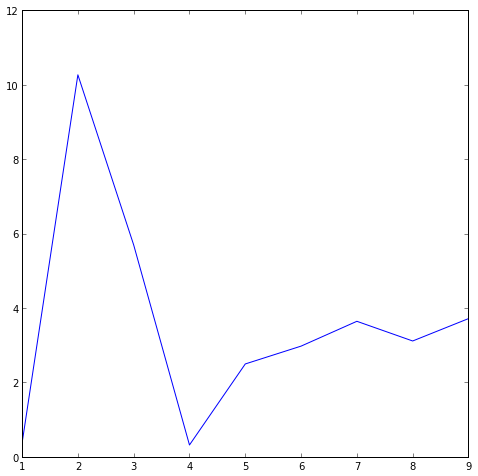

In [32]:
spreads = []
nclusters = range(1,10)
for i in nclusters:
    allvs = []
    for j in range(10):
        subset = array(pyrandom.sample(data,len(data)//2))
        vectors,error = vq.kmeans(subset,i)
        allvs += list(vectors)
    _,spread = vq.kmeans(array(allvs),i)
    spreads.append(spread)
plot(nclusters,spreads)

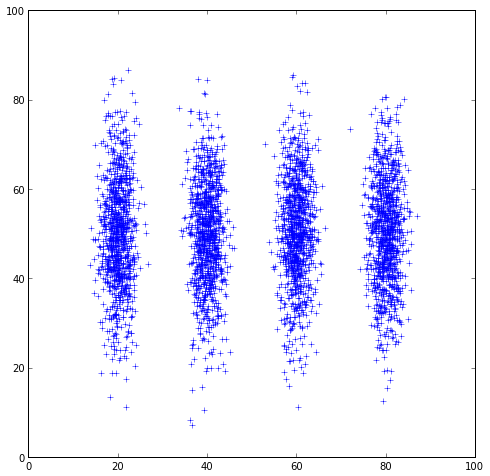

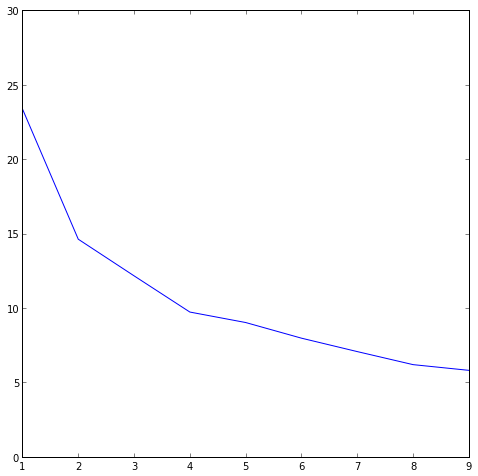